In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

# Again asking the question, are clinvar variants that are in amino acids that are near glycosites more likely to be pathogenic than ones that are not, but now with continuous values

In [6]:
path_dct = {'benign':1,
            'likely benign':2,
            'likely pathogenic':3,
            'pathogenic':4}

In [7]:
df = pd.read_csv('../data/clinvar_glycoproteins_distances.txt',
                 sep='\t',
                index_col=0)
df = df.sort_values(by='clinvar_path')
df['clinvar_path_val'] = [path_dct[c] for c in df['clinvar_path']]
df['log_distance'] = np.log10(df['distance_to_feature'])

Text(0, 0.5, 'log10(distance to N-Gly)')

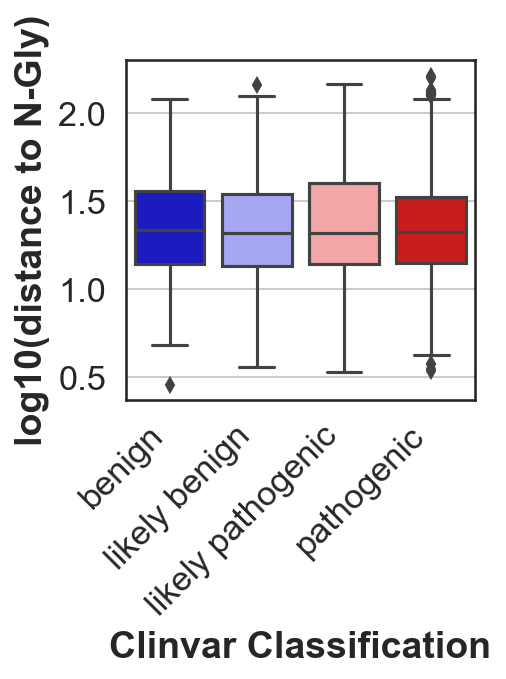

In [8]:
sns.set_context("paper")
    
# Set the font to be serif, rather than sans
sns.set(font='arial',font_scale=1.5)

# Make the background white, and specify the
# specific font family
sns.set_style("white", {
    "font.family": "arial",'axes.grid': True,"font.size":14,"axes.labelsize":14})

plt.figure(dpi=150,figsize=(3,3))
df = df.sort_values(by='clinvar_path')
sns.boxplot(x='clinvar_path',
            y='log_distance',
            data=df,
            palette='seismic',)
plt.xlabel('Clinvar Classification',fontweight='bold')
plt.xticks(rotation='45',ha='right')
plt.ylabel('log10(distance to N-Gly)',fontweight='bold')

In [5]:
formula = 'clinvar_path_val ~ distance_to_feature'

model = smf.ols(formula=formula, data=df).fit()

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       clinvar_path_val   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.455
Date:                Fri, 27 Mar 2020   Prob (F-statistic):              0.117
Time:                        10:38:09   Log-Likelihood:                -4542.5
No. Observations:                3306   AIC:                             9089.
Df Residuals:                    3304   BIC:                             9101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.5215      0.026    136.668      0.000       3.471       3.572
distance_to_feature    -0.0010      0.001     -1.567      0.117      -0.002       0.000
==============================================================================
Omnibus:                      948.707   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.262
Skew:                          -1.733   Prob(JB):                         0.00
Kurtosis:                       4.589   Cond. No.                         60.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Looking at relationships on a per amino acid change level

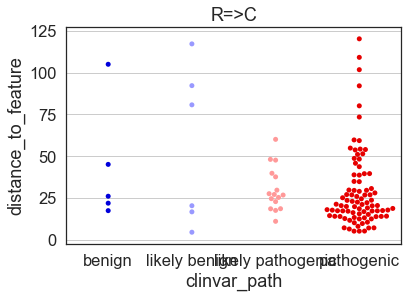

/Users/d/work/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


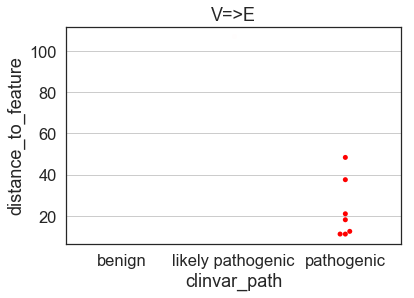

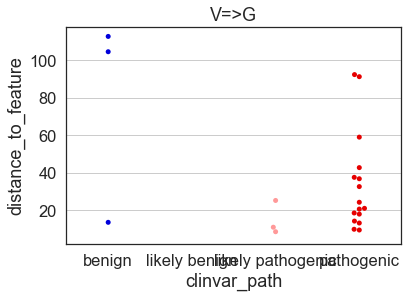

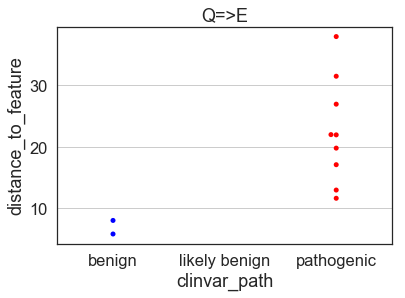

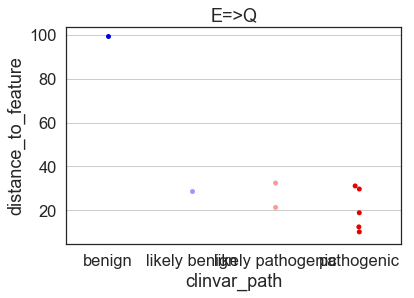

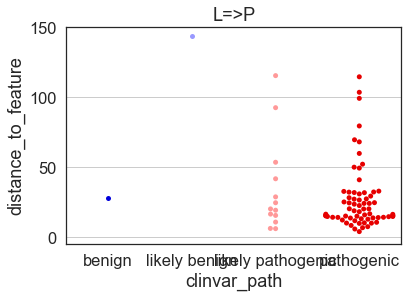

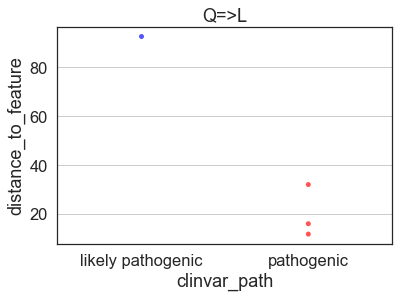

In [26]:
for ac in df['aa_change'].unique():
    aa_df = df[df['aa_change'] == ac]
    
    if aa_df.shape[0] < 3 or len(aa_df['clinvar_path'].unique()) < 2:
        continue
        
    formula = 'clinvar_path_val ~ distance_to_feature'

    model = smf.ols(formula=formula, data=aa_df).fit()  
    p = model.pvalues['distance_to_feature']
    
    if p < 0.1:
        
        sns.swarmplot(x='clinvar_path',
                        y='distance_to_feature',
                        data=aa_df,
                        palette='seismic',)

        plt.title(ac)
        plt.show()

## Looking on a per class basis

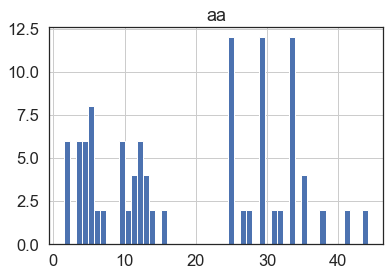

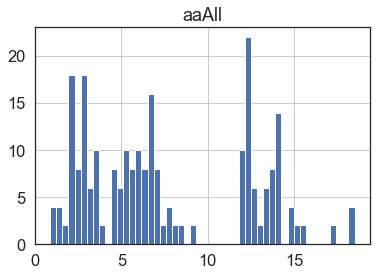

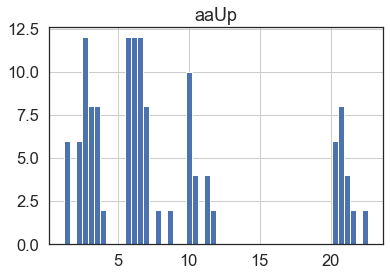

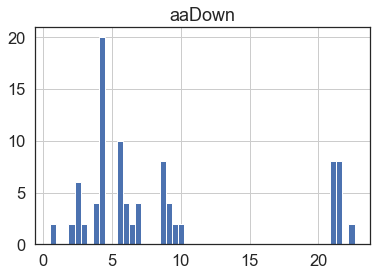

In [53]:
gi_df = pd.read_csv('../data/glyco_impact.1.csv')
gi_df['aa_change'] = gi_df['Var1'] + '=>' + gi_df['Var2']
gi_df_copy = gi_df.copy()
gi_df_copy['aa_change'] = gi_df_copy['Var2'] + '=>' + gi_df_copy['Var1']

gi_df = pd.concat([gi_df,gi_df_copy])

for gi_type in ['aa','aaAll','aaUp','aaDown']:
    one_gi = gi_df[gi_df['v1_type'] == gi_type]
    plt.hist(one_gi['glyco_dist'],50)
    plt.title(gi_type)
    plt.show()

In [54]:
high_gi_thresh = {'aa':20,
                 'aaAll':10,
                 'aaUp':15,
                 'aaDown':15}

In [55]:
merged = gi_df.merge(df,how='outer',on='aa_change')

In [71]:
merged

,Unnamed: 0,Var1,Var2,value,v1,v2,glyco_dist,v1_type,v2_type,aa_change,aa,protein,clinvar_path,clinvar_index,distance_to_feature,clinvar_path_val,log_distance
0,1.0,A,C,0.0,A_aaAll,C_aaAll,13.916580,aaAll,aaAll,A=>C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,A,D,-2.0,A_aaAll,D_aaAll,2.869046,aaAll,aaAll,A=>D,806.0,O60500,likely pathogenic,17417.0,46.96,3.0,1.671728
2,6.0,A,D,-2.0,A_aaAll,D_aaAll,2.869046,aaAll,aaAll,A=>D,457.0,Q12809,likely pathogenic,31819.0,40.60,3.0,1.608526
3,6.0,A,D,-2.0,A_aaAll,D_aaAll,2.869046,aaAll,aaAll,A=>D,645.0,P41180,likely pathogenic,25756.0,NaN,3.0,NaN
4,6.0,A,D,-2.0,A_aaAll,D_aaAll,2.869046,aaAll,aaAll,A=>D,893.0,P13569,likely pathogenic,31360.0,6.71,3.0,0.826723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R=>M,1283.0,P13569,pathogenic,31414.0,86.15,4.0,1.935255
8219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N=>Y,166.0,P00740,pathogenic,37533.0,5.34,4.0,0.727541
8220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N=>Y,45.0,Q12809,pathogenic,32199.0,93.00,4.0,1.968483
8221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K=>M,328.0,P18507,pathogenic,28696.0,35.99,4.0,1.556182


In [ ]:
10, 20, 50 and 150

0.882226642490427


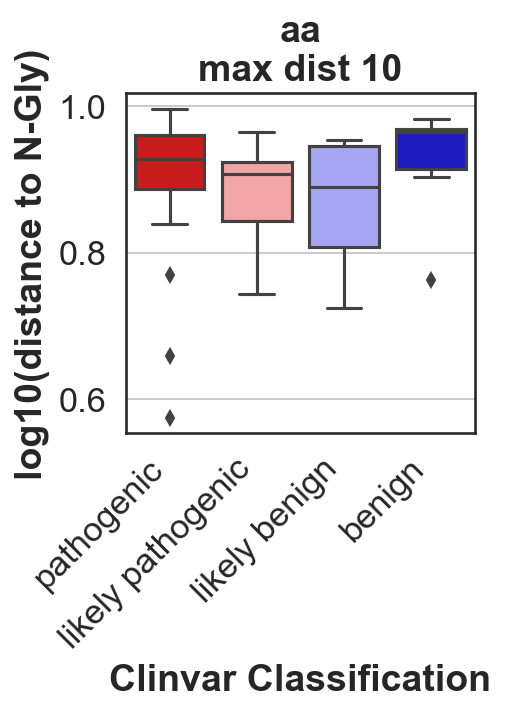

0.6746038102451912


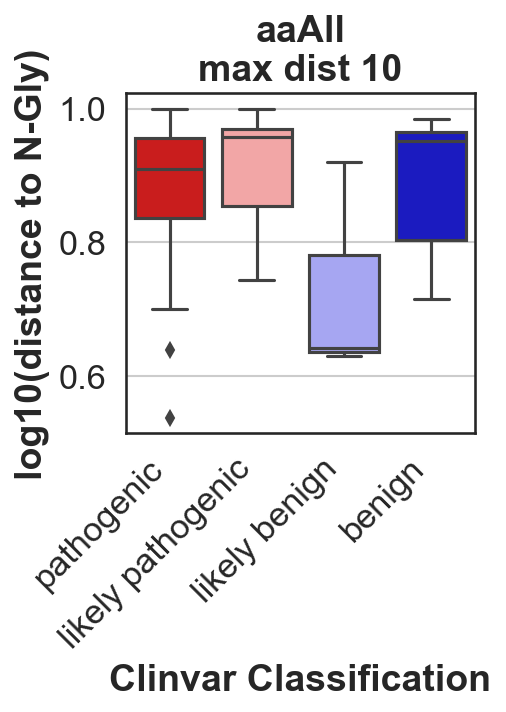

0.2688875116036105


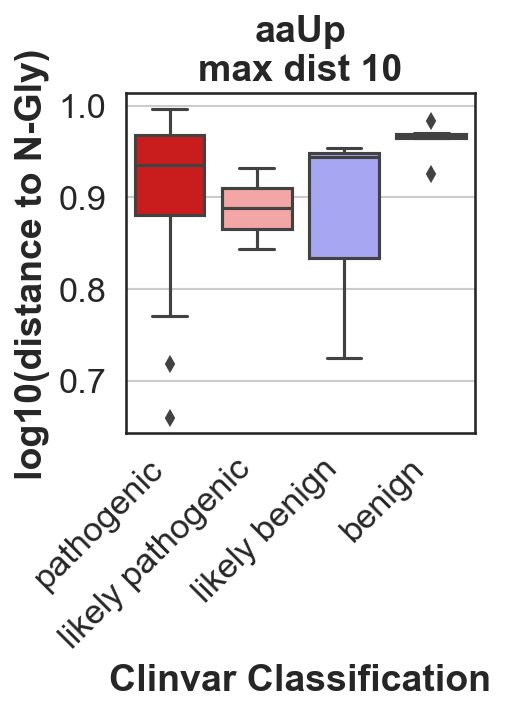

0.12278372555225295


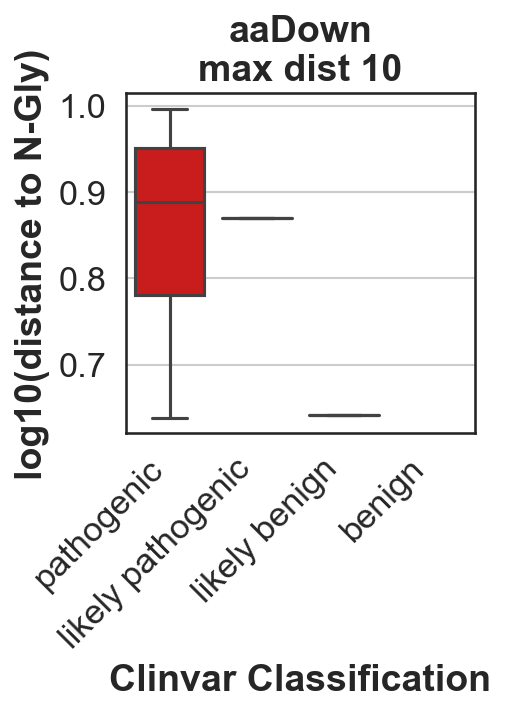

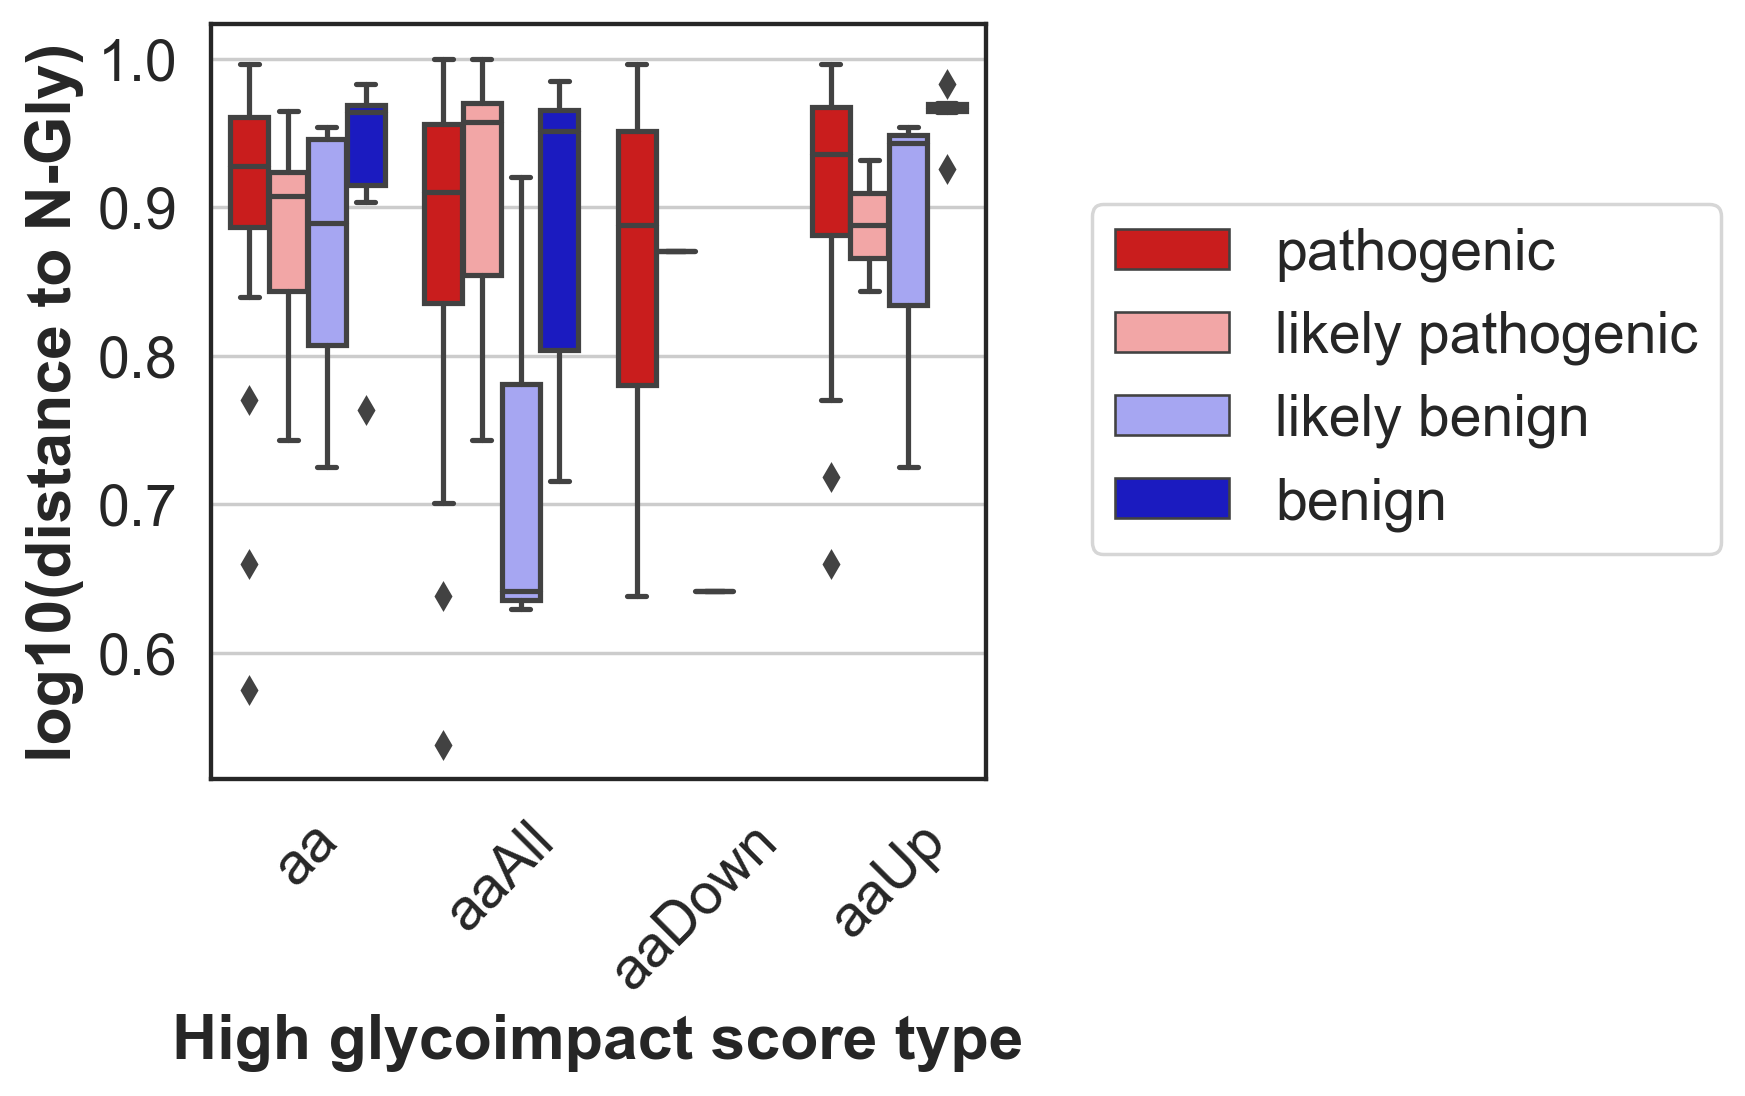

0.431619768994153


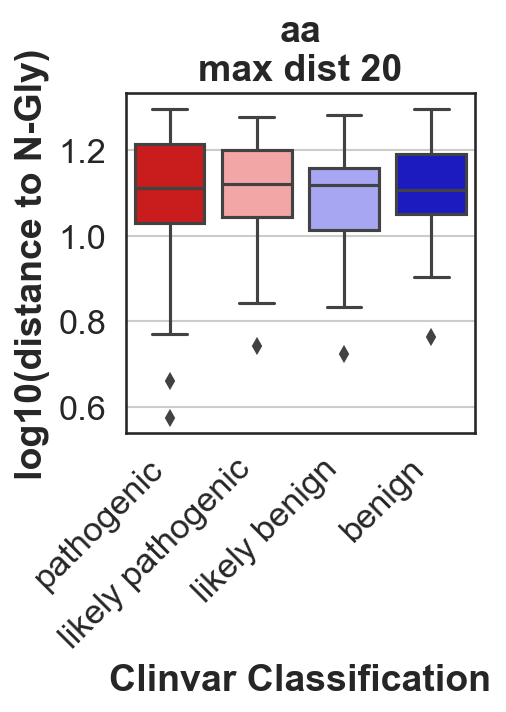

0.34561658290274255


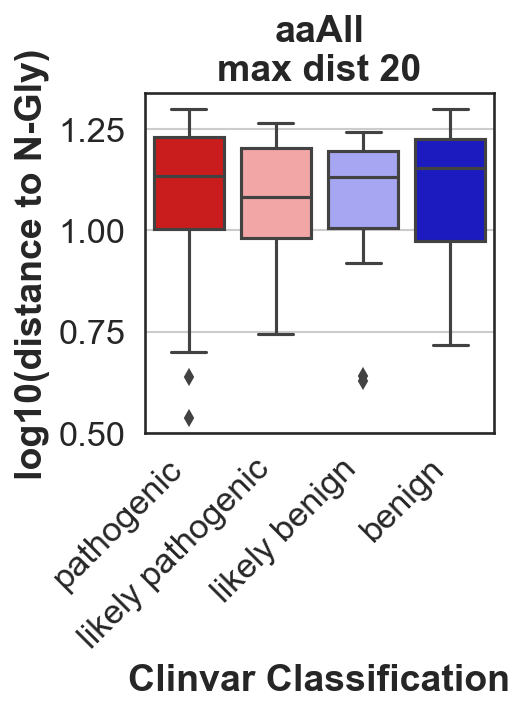

0.9852527763955687


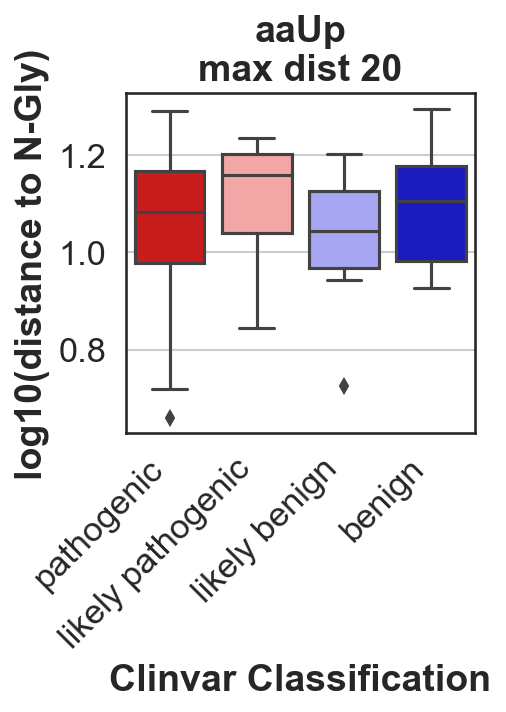

0.7021316388652465


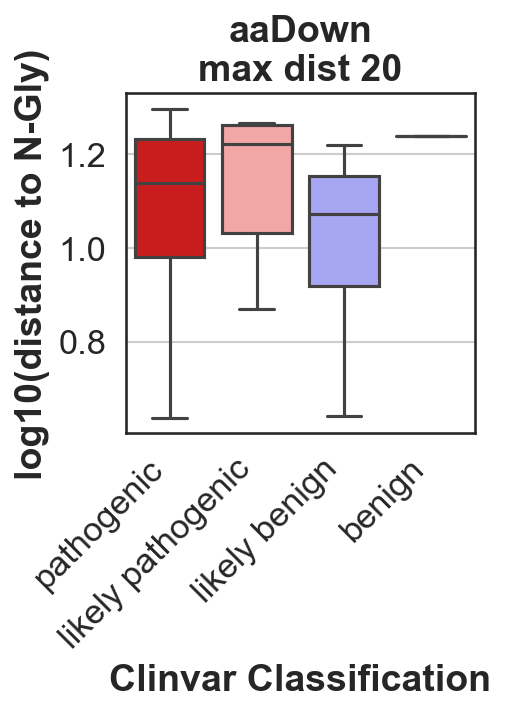

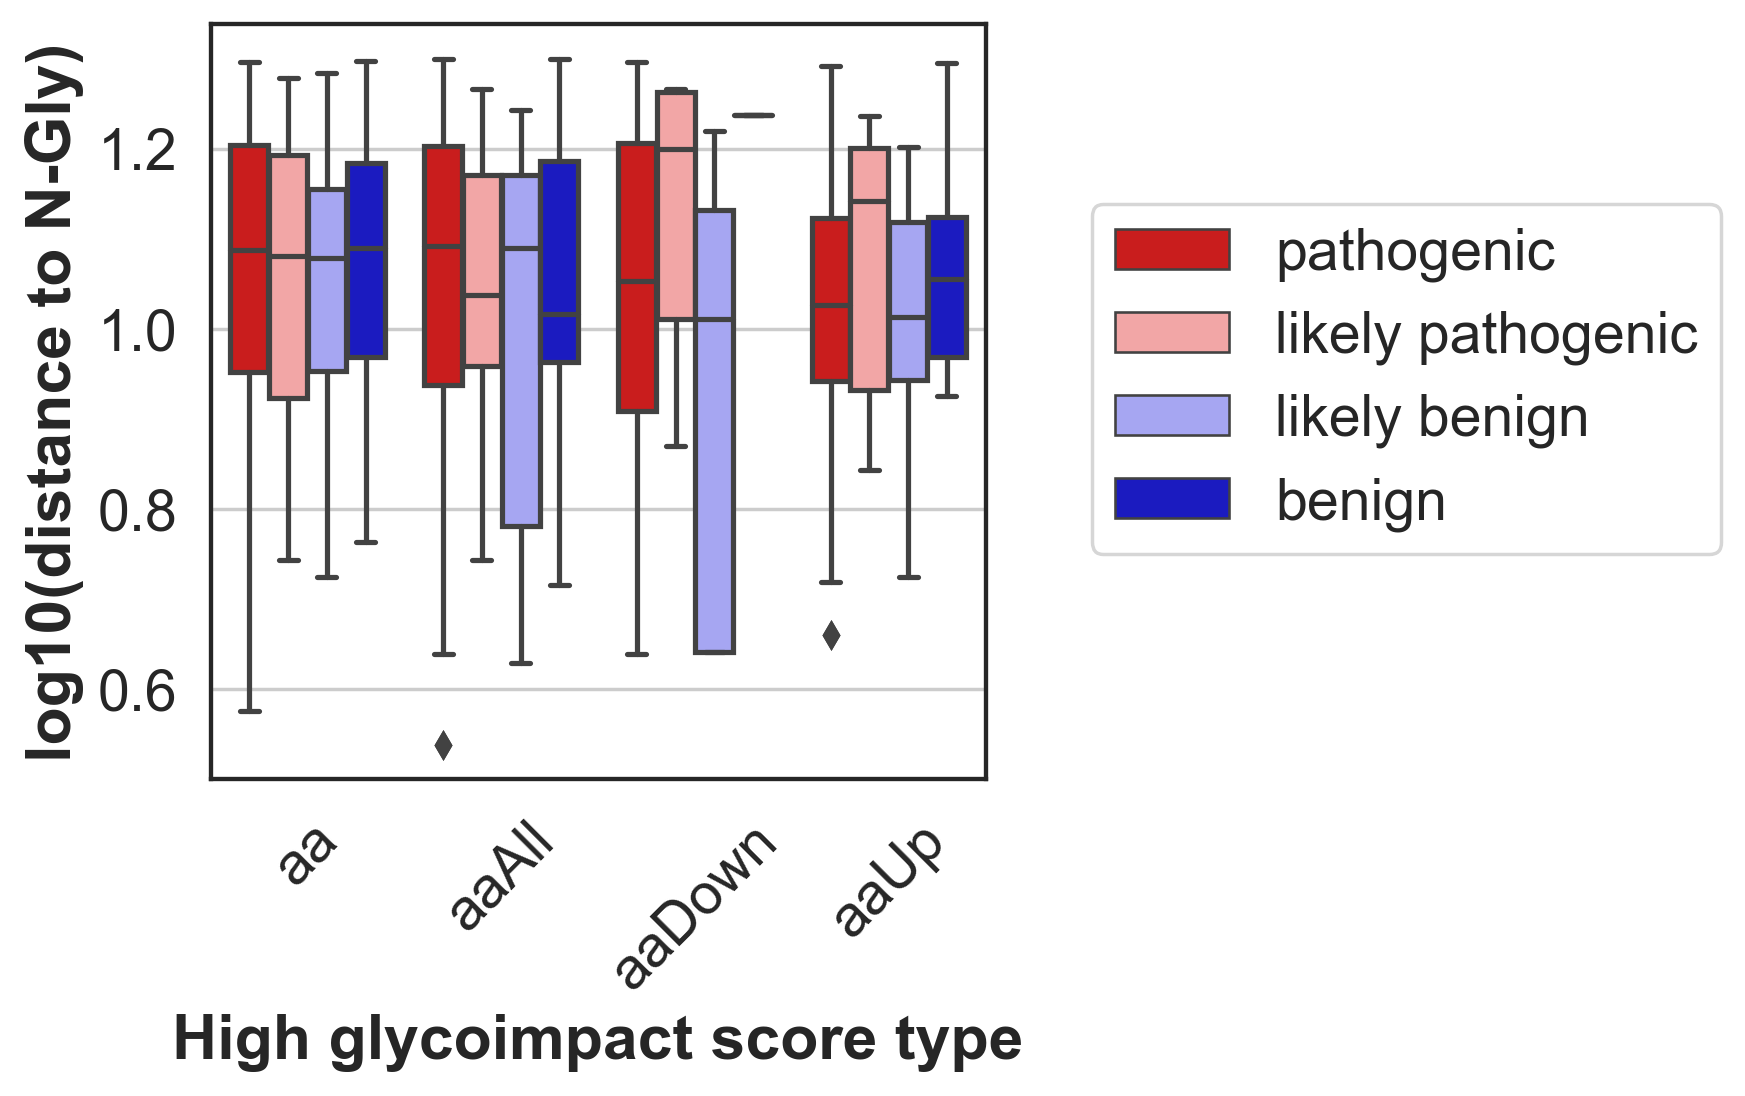

0.026868772110087025


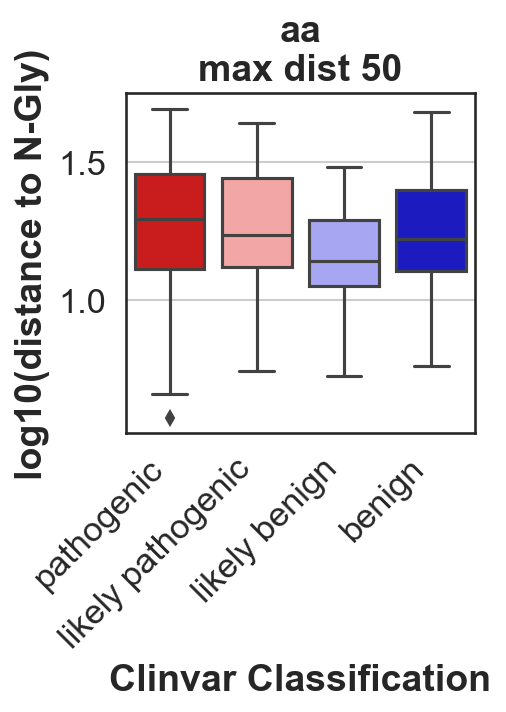

0.7780787860214011


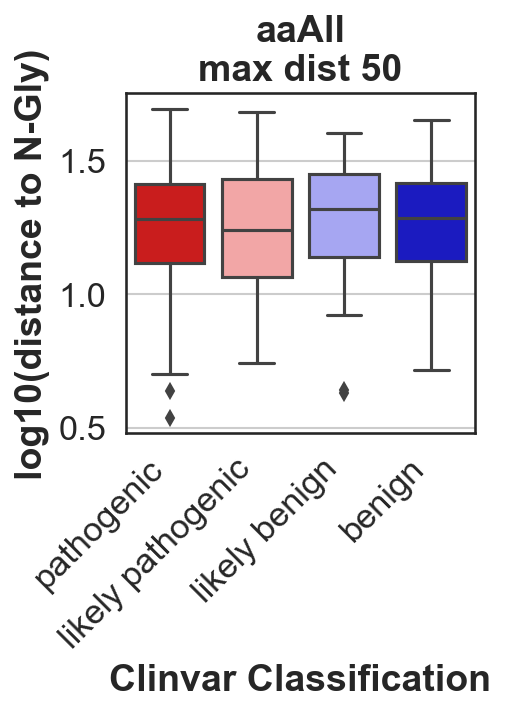

0.1820071353855836


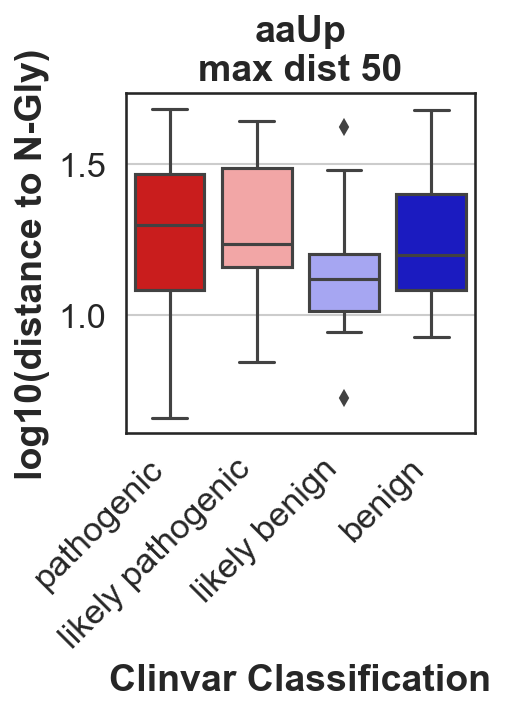

0.06275522412214454


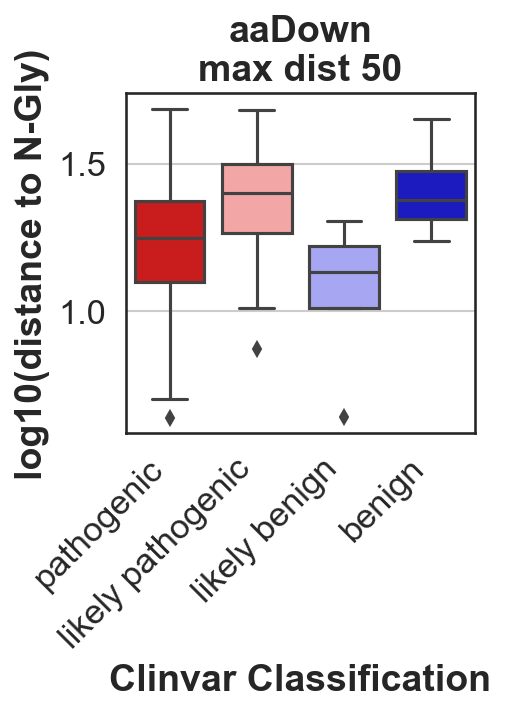

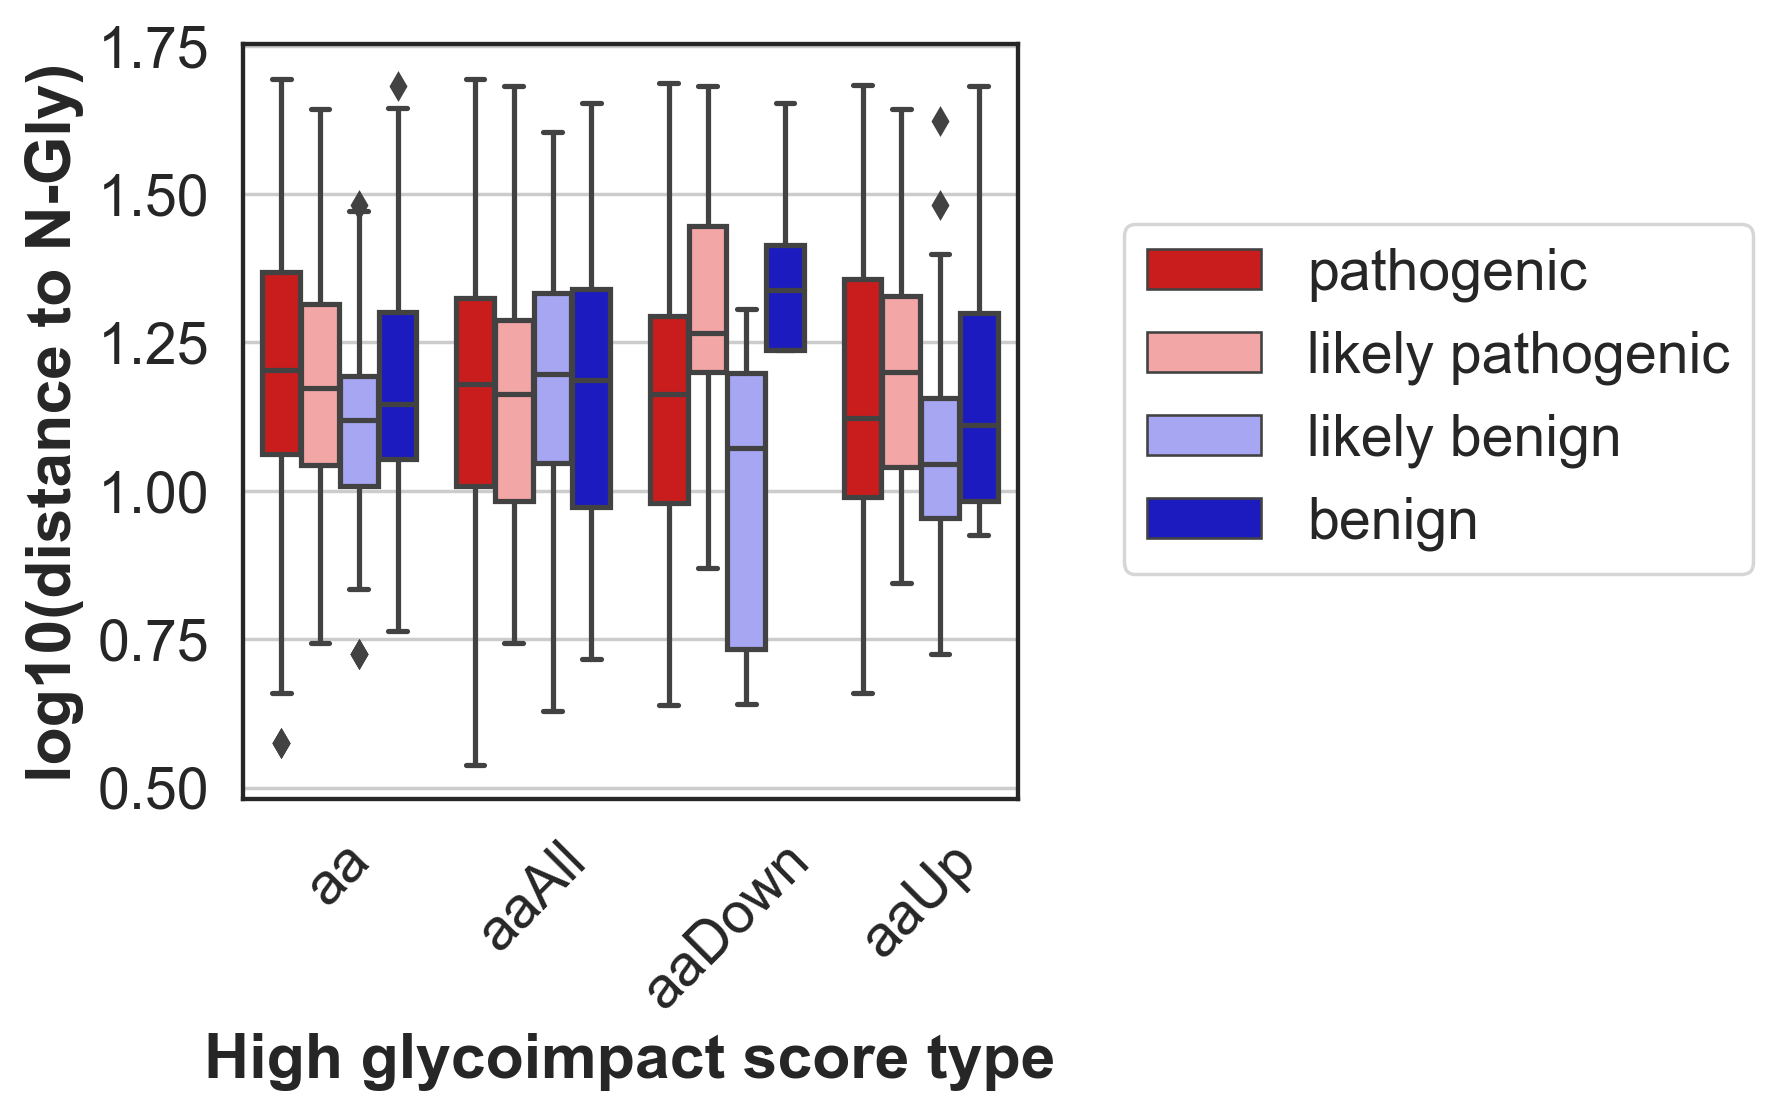

0.825272982903659


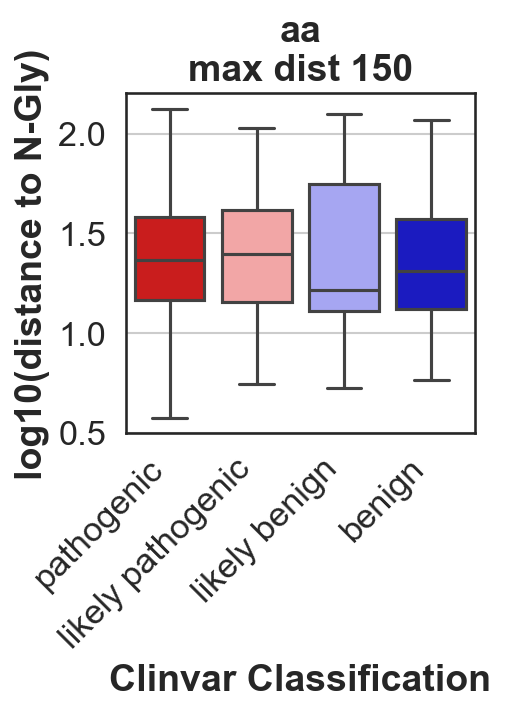

0.6489811401660084


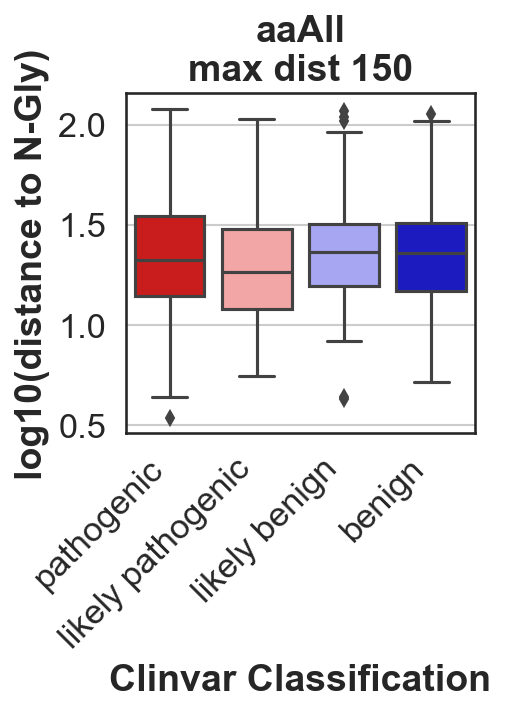

0.16628898774010614


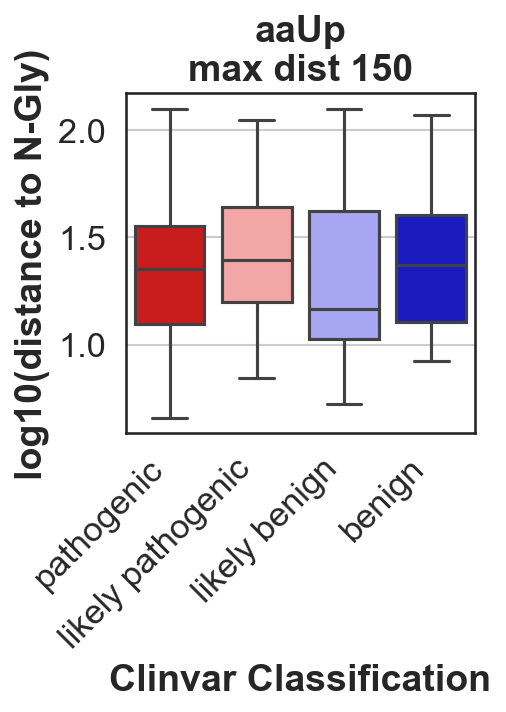

0.004783783229119515


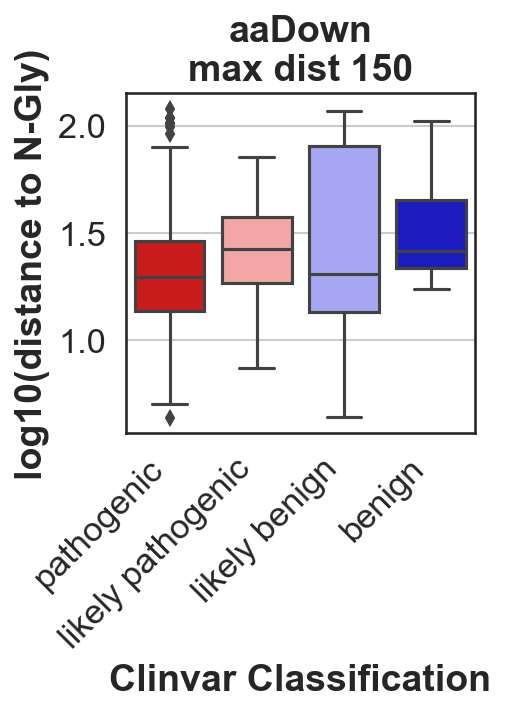

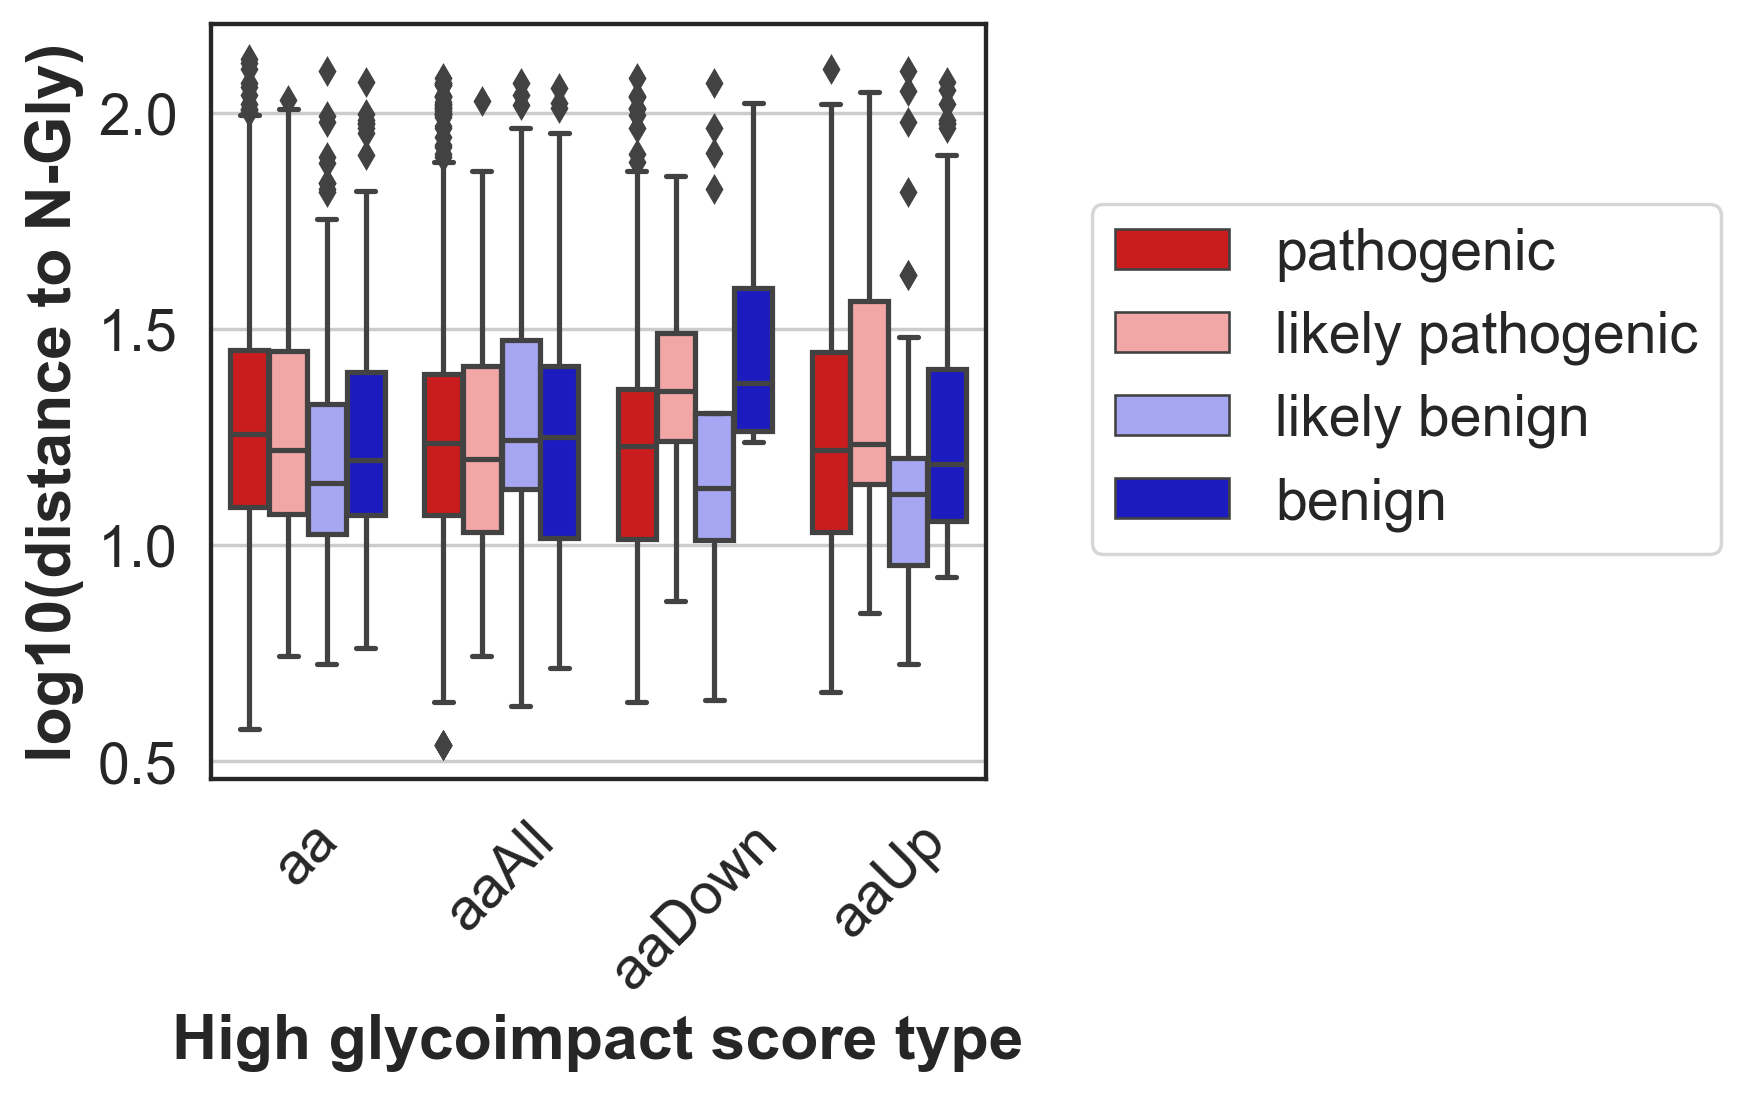

In [74]:
lst_ = []

for max_gdist in [10, 20, 50, 150]:
    
    gdist_merged = merged[merged['distance_to_feature'] <= max_gdist]
    
    for gi_type in ['aa','aaAll','aaUp','aaDown']:

        one_gi = gdist_merged[gdist_merged['v1_type'] == gi_type]
        high_gi = one_gi[one_gi['glyco_dist'] > high_gi_thresh[gi_type]]

        lst_.append(high_gi)

        formula = 'clinvar_path_val ~ distance_to_feature'

        model = smf.ols(formula=formula, data=high_gi).fit()  
        p = model.pvalues['distance_to_feature']
        print(p)
        plt.figure(dpi=150,figsize=(3,3))
        sns.boxplot(x='clinvar_path',
                        y='log_distance',
                        order=['pathogenic','likely pathogenic', 'likely benign', 'benign'],
                        data=high_gi,
                        palette='seismic_r',)

        plt.title(gi_type + '\nmax dist ' + str(max_gdist) ,fontweight='bold')
        plt.xlabel('Clinvar Classification',fontweight='bold')
        plt.xticks(rotation='45',ha='right')
        plt.ylabel('log10(distance to N-Gly)',fontweight='bold')
        plt.show()

    concat_df = pd.concat(lst_,axis=0)

    plt.figure(dpi=250,figsize=(4,4))
    concat_df = concat_df.sort_values(by='v1_type')
    sns.boxplot(data=concat_df,
                   x='v1_type',
                   y='log_distance',
                   palette='seismic_r',
                   hue_order=['pathogenic','likely pathogenic', 'likely benign', 'benign'],
                   hue='clinvar_path')
    plt.legend(bbox_to_anchor=(1.1,0.8))
    plt.xticks(rotation='45')
    plt.xlabel('High glycoimpact score type',fontweight='bold')
    plt.ylabel('log10(distance to N-Gly)',fontweight='bold')
    plt.show()

## Now looking generally at counts that belong to each category

In [66]:
table = concat_df.groupby(by=['clinvar_path','v1_type'],as_index=False).count()[['clinvar_path','v1_type','aa']]

In [67]:
table

,clinvar_path,v1_type,aa
0,benign,aa,89
1,benign,aaAll,81
2,benign,aaDown,8
3,benign,aaUp,63
4,likely benign,aa,70
5,likely benign,aaAll,54
6,likely benign,aaDown,16
7,likely benign,aaUp,41
8,likely pathogenic,aa,61
9,likely pathogenic,aaAll,93
